>> ## Data Breach Analytics 2005 - 2017 
> (Part IV - Supervised Text Classification Modeling part 2 non-text features) - organizations only
#### by Miriam Rodriguez

Classification models need to be created to determine the risk of a data breach:
- the likelihood of a specific type of breach
- which organization type is likely to be hit
- what is the correlation

Separate the features to predict each type of breach and which organizations are affected

Organizations could develop security systems as a result of this study.


# Importing packages 

In [ ]:
import warnings
warnings.filterwarnings(action= 'ignore')  # To ignore all warnings that arise here to enhance clarity

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from pandas.core import datetools

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings(action= 'ignore')  # To ignore all warnings that arise here to enhance clarity

## Read cleaned data

In [3]:
#import breach data ... open or read the bank data
df=pd.read_csv("databreach_cleaned.csv")
df.head()


,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,GDP
0,2006,"Deloitte & Touche, McAfee",United States,PORT,BSO,9290,"An external auditor lost a CD with names, Soci...",37.090240,-95.712891,5,2,0,2,72466970
1,2007,"TennCare, Americhoice Inc.",United States,PORT,MED,67000,"There are 67,000 TennCare \r\n enro...",35.960638,-83.920739,5,6,0,3,75725457
2,2007,Mercer Health and Benefits,United States,PORT,BSF,10500,A laptop computer was stolen from a vehicle.,37.090240,-95.712891,5,1,0,3,75725457
3,2007,"Fidelity Investments, Dairy Farmers of America",United States,PORT,BSF,69,A Fidelity laptop used by a former Fidelity em...,37.090240,-95.712891,5,1,0,3,75725457
4,2007,Dai Nippon,United States,INSD,BSO,0,A former contract worker of a Japanese commerc...,37.090240,-95.712891,3,2,0,3,75725457


# Data Prep

In [4]:
#drop or remove the column 'id' since this column is not used in the analysis and disply the result
df_stat = df.drop(['GDP', 'Latitude', 'Longitude', 'Breach_Type', 'Organization_Type', 'State', 'Company', 'Description', 'Year_CAT'], axis=1)
df_stat.head()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,9290,5,2,0
1,2007,67000,5,6,0
2,2007,10500,5,1,0
3,2007,69,5,1,0
4,2007,0,3,2,0


In [5]:
#  Convert Total Records either harm (>1) or no harm (0) in terms of records breached.

df_stat["Total_Recs"][df_stat["Total_Recs"]>0] = 1
df_stat.head()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,1,5,2,0
1,2007,1,5,6,0
2,2007,1,5,1,0
3,2007,1,5,1,0
4,2007,0,3,2,0


In [6]:
#describe the data

df_stat.describe()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
count,8177.000000,8177.000000,8177.000000,8177.000000,8177.000000
mean,2012.204965,0.728996,4.015042,4.534915,23.191513
std,3.425944,0.444505,1.992745,1.825506,15.301632
min,2005.000000,0.000000,0.000000,1.000000,0.000000
25%,2010.000000,0.000000,2.000000,3.000000,9.000000
50%,2012.000000,1.000000,4.000000,6.000000,21.000000
75%,2015.000000,1.000000,5.000000,6.000000,36.000000
max,2018.000000,1.000000,7.000000,7.000000,52.000000


In [7]:
#show the information about the dataset
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8177 entries, 0 to 8176
Data columns (total 5 columns):
Breach_Year              8177 non-null int64
Total_Recs               8177 non-null int64
Breach_Type_CAT          8177 non-null int64
Organization_Type_CAT    8177 non-null int64
State_CAT                8177 non-null int64
dtypes: int64(5)
memory usage: 319.5 KB


# Classification Model building

In [8]:
# rename columns Harm
df_stat = df_stat.rename(columns={'Total_Recs': 'Harm'})

In [9]:
df_stat

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,1,5,2,0
1,2007,1,5,6,0
2,2007,1,5,1,0
3,2007,1,5,1,0
4,2007,0,3,2,0
5,2007,1,7,6,0
6,2008,0,5,2,0
7,2009,0,4,5,0
8,2009,1,2,4,0
9,2010,1,4,6,0


## Decision Tree Model Building, Validation, Evaluation


In [10]:
#set X, y value
y = df_stat['Harm']
X = df_stat.drop(['Harm'], axis=1)

In [11]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
print  metrics.roc_auc_score(y_test, dt.predict(X_test))

0.743276283619
[[ 355  317]
 [ 313 1469]]
             precision    recall  f1-score   support

          0       0.53      0.53      0.53       672
          1       0.82      0.82      0.82      1782

avg / total       0.74      0.74      0.74      2454

0.676314233606


Question: Interpret the results of confusion matrix
    
- The decision tree model is 74% accurate. Therefore, we expect that the model will be about 74% accurate when the model is applied into a real-world situation 
- 355 incidents were correctly classified as not causing harm, 319 incidents were misclassified as not causing harm.
- 1463 incidents were correctly classified as causing harm, 317 incidents were misclassified as causing harm.
- Total number in testing dataset is 2454, total harm = 672 (355 + 317), total with no harm = 1782 (319 + 1463). 
- Overall accuracy calculated as correctly classified 355 + 1463 / 2454 total in test dsn = 74%

In [14]:
Org_Type_dm = pd.get_dummies(df_stat['Organization_Type_CAT'], prefix='Org_Type')
df_stat_sp = df_stat.join(Org_Type_dm)
df_stat_sp.head()

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Org_Type_1,Org_Type_2,Org_Type_3,Org_Type_4,Org_Type_5,Org_Type_6,Org_Type_7
0,2006,1,5,2,0,0,1,0,0,0,0,0
1,2007,1,5,6,0,0,0,0,0,0,1,0
2,2007,1,5,1,0,1,0,0,0,0,0,0
3,2007,1,5,1,0,1,0,0,0,0,0,0
4,2007,0,3,2,0,0,1,0,0,0,0,0


In [15]:
df_stat_sp = df_stat_sp.rename(columns={'Org_Type_1': 'Finance', 'Org_Type_2': 'Other', 'Org_Type_3': 'Retail', 'Org_Type_4': 'Education', 'Org_Type_5': 'Government', 'Org_Type_6': 'Medical', 'Org_Type_7': 'NonProfit'})
df_stat_sp.head(2)

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Finance,Other,Retail,Education,Government,Medical,NonProfit
0,2006,1,5,2,0,0,1,0,0,0,0,0
1,2007,1,5,6,0,0,0,0,0,0,1,0


In [16]:
df_stat_sp = df_stat_sp.drop(['Organization_Type_CAT'], axis=1)
df_stat_sp.head()

,Breach_Year,Harm,Breach_Type_CAT,State_CAT,Finance,Other,Retail,Education,Government,Medical,NonProfit
0,2006,1,5,0,0,1,0,0,0,0,0
1,2007,1,5,0,0,0,0,0,0,1,0
2,2007,1,5,0,1,0,0,0,0,0,0
3,2007,1,5,0,1,0,0,0,0,0,0
4,2007,0,3,0,0,1,0,0,0,0,0


## Model Creation and Deployment: Predict y values using the decision tree classifiers.
- Create and load scoringdataset.csv (scoring dataset). This dataset has no y value, representing the future. Decision model will be deployed to determine if we can predict the type of breach.

In [17]:
#set X, y value
y = df_stat_sp['Medical']
X = df_stat_sp.drop(['Medical'], axis=1)

In [18]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
print  metrics.roc_auc_score(y_test, dt.predict(X_test))

1.0
[[1207    0]
 [   0 1247]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1207
          1       1.00      1.00      1.00      1247

avg / total       1.00      1.00      1.00      2454

1.0


#### Model Deployment

In [20]:
df_score_m = df_stat_sp.drop(['Medical'], axis=1)
df_score_m.head()

,Breach_Year,Harm,Breach_Type_CAT,State_CAT,Finance,Other,Retail,Education,Government,NonProfit
0,2006,1,5,0,0,1,0,0,0,0
1,2007,1,5,0,0,0,0,0,0,0
2,2007,1,5,0,1,0,0,0,0,0
3,2007,1,5,0,1,0,0,0,0,0
4,2007,0,3,0,0,1,0,0,0,0


In [21]:
df_score_m.to_csv("scoringdataset_medical.csv",index=False)

In [22]:
# load scoringdataset_hack.csv
score_m=pd.read_csv("scoringdataset_medical.csv")
print score_m.head()

   Breach_Year  Harm  Breach_Type_CAT  State_CAT  Finance  Other  Retail  \
0         2006     1                5          0        0      1       0   
1         2007     1                5          0        0      0       0   
2         2007     1                5          0        1      0       0   
3         2007     1                5          0        1      0       0   
4         2007     0                3          0        0      1       0   

   Education  Government  NonProfit  
0          0           0          0  
1          0           0          0  
2          0           0          0  
3          0           0          0  
4          0           0          0  


In [23]:
# finally generate the predicted y value
predictedY = dt.predict(score_m)
predictedY

array([0, 1, 0, ..., 0, 1, 1], dtype=uint8)

In [24]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head(20)

,predicted Y
0,0
1,1
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,1


In [25]:
# Check hacking column to see if matches predicted Y
df_stat_sp.Medical.head(20)

0     0
1     1
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: Medical, dtype: uint8

In [26]:
data_m = score_m.join(predictedY) 
data_m.head(20)

,Breach_Year,Harm,Breach_Type_CAT,State_CAT,Finance,Other,Retail,Education,Government,NonProfit,predicted Y
0,2006,1,5,0,0,1,0,0,0,0,0
1,2007,1,5,0,0,0,0,0,0,0,1
2,2007,1,5,0,1,0,0,0,0,0,0
3,2007,1,5,0,1,0,0,0,0,0,0
4,2007,0,3,0,0,1,0,0,0,0,0
5,2007,1,7,0,0,0,0,0,0,0,1
6,2008,0,5,0,0,1,0,0,0,0,0
7,2009,0,4,0,0,0,0,0,1,0,0
8,2009,1,2,0,0,0,0,1,0,0,0
9,2010,1,4,0,0,0,0,0,0,0,1


### Medical was predicted correctly

#### Model Create

In [27]:
#set X, y value
y = df_stat_sp['Finance']
X = df_stat_sp.drop(['Finance'], axis=1)

In [28]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
print  metrics.roc_auc_score(y_test, dt.predict(X_test))

1.0
[[2237    0]
 [   0  217]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2237
          1       1.00      1.00      1.00       217

avg / total       1.00      1.00      1.00      2454

1.0


#### Model Deployment

In [30]:
df_score_f = df_stat_sp.drop(['Finance'], axis=1)
df_score_f.head()

,Breach_Year,Harm,Breach_Type_CAT,State_CAT,Other,Retail,Education,Government,Medical,NonProfit
0,2006,1,5,0,1,0,0,0,0,0
1,2007,1,5,0,0,0,0,0,1,0
2,2007,1,5,0,0,0,0,0,0,0
3,2007,1,5,0,0,0,0,0,0,0
4,2007,0,3,0,1,0,0,0,0,0


In [32]:
df_score_f.to_csv("scoringdataset_finance.csv",index=False)

In [33]:
# load scoringdataset_card.csv
score_f=pd.read_csv("scoringdataset_finance.csv")
print score_f.head()

   Breach_Year  Harm  Breach_Type_CAT  State_CAT  Other  Retail  Education  \
0         2006     1                5          0      1       0          0   
1         2007     1                5          0      0       0          0   
2         2007     1                5          0      0       0          0   
3         2007     1                5          0      0       0          0   
4         2007     0                3          0      1       0          0   

   Government  Medical  NonProfit  
0           0        0          0  
1           0        1          0  
2           0        0          0  
3           0        0          0  
4           0        0          0  


In [34]:
# finally generate the predicted y value
predictedY = dt.predict(score_f)
predictedY

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [35]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head(20)

,predicted Y
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [36]:
data_f = score_f.join(predictedY) 
data_f.head(20)

,Breach_Year,Harm,Breach_Type_CAT,State_CAT,Other,Retail,Education,Government,Medical,NonProfit,predicted Y
0,2006,1,5,0,1,0,0,0,0,0,0
1,2007,1,5,0,0,0,0,0,1,0,0
2,2007,1,5,0,0,0,0,0,0,0,1
3,2007,1,5,0,0,0,0,0,0,0,1
4,2007,0,3,0,1,0,0,0,0,0,0
5,2007,1,7,0,0,0,0,0,1,0,0
6,2008,0,5,0,1,0,0,0,0,0,0
7,2009,0,4,0,0,0,0,1,0,0,0
8,2009,1,2,0,0,0,1,0,0,0,0
9,2010,1,4,0,0,0,0,0,1,0,0


In [37]:
# Check credit card column to see if matches predicted Y
df_stat_sp.Finance.head(20)

0     0
1     0
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    0
19    1
Name: Finance, dtype: uint8

#### Finance was predicted correctly


#### Model Creation

In [43]:
#set X, y value
y = df_stat_sp['Education']
X = df_stat_sp.drop(['Education'], axis=1)

In [44]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
print  metrics.roc_auc_score(y_test, dt.predict(X_test))

1.0
[[2237    0]
 [   0  217]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2237
          1       1.00      1.00      1.00       217

avg / total       1.00      1.00      1.00      2454

1.0


#### Model Deployment

In [46]:
df_score_e = df_stat_sp.drop(['Education'], axis=1)
df_score_e.head()

,Breach_Year,Harm,Breach_Type_CAT,State_CAT,Finance,Other,Retail,Government,Medical,NonProfit
0,2006,1,5,0,0,1,0,0,0,0
1,2007,1,5,0,0,0,0,0,1,0
2,2007,1,5,0,1,0,0,0,0,0
3,2007,1,5,0,1,0,0,0,0,0
4,2007,0,3,0,0,1,0,0,0,0


In [47]:
df_score_e.to_csv("scoringdataset_edu.csv",index=False)

In [48]:
# load scoringdataset_card.csv
score_e=pd.read_csv("scoringdataset_edu.csv")
print score_e.head()

   Breach_Year  Harm  Breach_Type_CAT  State_CAT  Finance  Other  Retail  \
0         2006     1                5          0        0      1       0   
1         2007     1                5          0        0      0       0   
2         2007     1                5          0        1      0       0   
3         2007     1                5          0        1      0       0   
4         2007     0                3          0        0      1       0   

   Government  Medical  NonProfit  
0           0        0          0  
1           0        1          0  
2           0        0          0  
3           0        0          0  
4           0        0          0  


In [49]:
# finally generate the predicted y value
predictedY = dt.predict(score_e)
predictedY

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [50]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head(20)

,predicted Y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


#### Education was predicted correctly for first 20


In [51]:
# Check education column to see if matches predicted Y
df_stat_sp.Education.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
Name: Education, dtype: uint8

In [52]:
data_e = score_e.join(predictedY) 
data_e.head(20)

,Breach_Year,Harm,Breach_Type_CAT,State_CAT,Finance,Other,Retail,Government,Medical,NonProfit,predicted Y
0,2006,1,5,0,0,1,0,0,0,0,0
1,2007,1,5,0,0,0,0,0,1,0,0
2,2007,1,5,0,1,0,0,0,0,0,0
3,2007,1,5,0,1,0,0,0,0,0,0
4,2007,0,3,0,0,1,0,0,0,0,0
5,2007,1,7,0,0,0,0,0,1,0,0
6,2008,0,5,0,0,1,0,0,0,0,0
7,2009,0,4,0,0,0,0,1,0,0,0
8,2009,1,2,0,0,0,0,0,0,0,1
9,2010,1,4,0,0,0,0,0,1,0,0


> # Logistic Regression
- For logistic regression & logit, dummy variables for categorical columns have already been created (Breach_type or Organization_type)
- When declaring X and y, X_lr and y_lr will be used to not to overwrite X and y since X and y will be used for knn and other algorithms (e.g., random forest, extratreeclassifier)


In [53]:
print df_stat_sp.dtypes

Breach_Year        int64
Harm               int64
Breach_Type_CAT    int64
State_CAT          int64
Finance            uint8
Other              uint8
Retail             uint8
Education          uint8
Government         uint8
Medical            uint8
NonProfit          uint8
dtype: object


In [54]:
# correlation analysis & heatmap
df_stat_sp.corr()

,Breach_Year,Harm,Breach_Type_CAT,State_CAT,Finance,Other,Retail,Education,Government,Medical,NonProfit
Breach_Year,1.000000,-0.030102,-0.105561,-0.066180,-0.116158,0.058932,-0.057129,-0.259685,-0.206075,0.346661,-0.050943
Harm,-0.030102,1.000000,0.155248,0.077331,-0.163239,-0.273378,-0.163096,0.041889,-0.008428,0.347716,-0.027735
Breach_Type_CAT,-0.105561,0.155248,1.000000,0.038525,-0.036496,-0.158549,-0.134333,0.052915,0.085351,0.116079,-0.003487
State_CAT,-0.066180,0.077331,0.038525,1.000000,-0.026117,-0.032109,-0.022117,0.022119,-0.005687,0.036898,0.004852
Finance,-0.116158,-0.163239,-0.036496,-0.026117,1.000000,-0.120149,-0.090358,-0.105636,-0.102523,-0.315954,-0.038339
Other,0.058932,-0.273378,-0.158549,-0.032109,-0.120149,1.000000,-0.108142,-0.126427,-0.122702,-0.378140,-0.045885
Retail,-0.057129,-0.163096,-0.134333,-0.022117,-0.090358,-0.108142,1.000000,-0.095079,-0.092277,-0.284379,-0.034508
Education,-0.259685,0.041889,0.052915,0.022119,-0.105636,-0.126427,-0.095079,1.000000,-0.107881,-0.332465,-0.040343
Government,-0.206075,-0.008428,0.085351,-0.005687,-0.102523,-0.122702,-0.092277,-0.107881,1.000000,-0.322667,-0.039154
Medical,0.346661,0.347716,0.116079,0.036898,-0.315954,-0.378140,-0.284379,-0.332465,-0.322667,1.000000,-0.120664


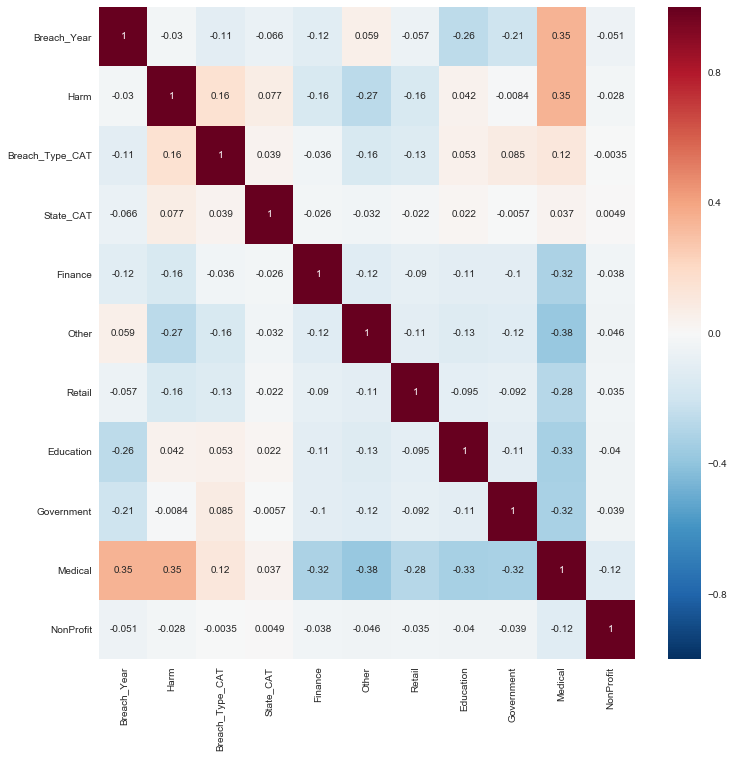

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(df_stat_sp.corr(), annot=True)

What are the findings from correlation analysis?
- The higher values seem to occur with medical and harm.
- Retail and medical have a negative correlation.
- Medical has a positive correlation with the other organizatons.
- For the most part the correlation scores appear to be low.

#### For this example we will use Harm which had a higher correlation with Medical Organization Types

In [56]:
# declaring X_lr, y_lr (instead of X and y). We don't want to overwrite X and y
y_lr = df_stat_sp['Harm']
X_lr = df_stat_sp.drop(['Harm'], axis=1)

In [57]:
X_lr.head(2)

,Breach_Year,Breach_Type_CAT,State_CAT,Finance,Other,Retail,Education,Government,Medical,NonProfit
0,2006,5,0,0,1,0,0,0,0,0
1,2007,5,0,0,0,0,0,0,1,0


In [58]:
# evaluate the model by splitting into train and test sets (split validation) 70%/30%

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
#Split valuation. 
#Report the following model evaluation metrics: overall model accuracy, confusion matrix, AUC score, classification report
print  metrics.accuracy_score(y_test, lr.predict(X_test))
print  metrics.confusion_matrix(y_test, lr.predict(X_test))
print  metrics.classification_report(y_test, lr.predict(X_test))
print  metrics.roc_auc_score(y_test, lr.predict(X_test))

0.765688671557
[[ 302  370]
 [ 205 1577]]
             precision    recall  f1-score   support

          0       0.60      0.45      0.51       672
          1       0.81      0.88      0.85      1782

avg / total       0.75      0.77      0.75      2454

0.667182740099


**100 model accuracy for Disclosure**
- **100 AUC score; AUC = Area Under Curve**
    - TPR = (true positives/total positives) = / =  
    - FPR = (false positives/total negatives) = / =  

In [60]:
# evaluate the decision tree model for harm using 10-fold cross-validation
cross_scores = cross_val_score(lr, X_lr, y_lr, scoring='accuracy', cv=10)
print cross_scores
print cross_scores.mean()

[ 0.71550672  0.72738386  0.799511    0.75061125  0.79217604  0.71393643
  0.74908201  0.83108935  0.74173807  0.77968176]
0.760071648468


> # Logit Model

In [61]:
# instantiate a logit model, and fit with X_lr and y_lr
# this is like a statistical model, rather than a data mining model ...
logit = sm.Logit(y_lr, X_lr) 
model_logit = logit.fit_regularized()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.487843840627
            Iterations: 84
            Function evaluations: 92
            Gradient evaluations: 84


In [64]:
# logit pred_table()
model_logit.predict()

array([ 0.52317812,  0.91758366,  0.55318516, ...,  0.36597754,
        0.89740785,  0.89740785])

In [65]:
model_logit.pred_table()

array([[  966.,  1250.],
       [  616.,  5345.]])

Interpret the accuracy based on the pred_table

- The model accuracy is ( + ) /  = 0.000
-  appears to be the main predictor


In [66]:
# look at the confidence interval of each coeffecient
print model_logit.conf_int()

                          0           1
Breach_Year       -0.092733   -0.058444
Breach_Type_CAT    0.052150    0.108282
State_CAT          0.004684    0.011847
Finance          117.020604  186.016155
Other            116.798046  185.845998
Retail           117.010917  186.020095
Education        118.196463  187.164877
Government       117.846488  186.828142
Medical          119.166393  188.263190
NonProfit        117.508817  186.511401


> # K-nearest Neighbors (knn)
- Pick the best k value first.

Text(0,0.5,'accuracy')

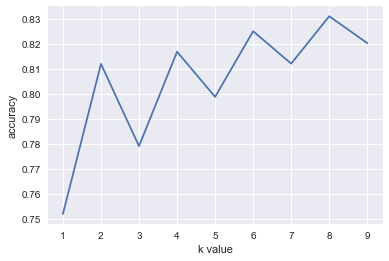

In [67]:
# search for an optimal value of K
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')



## Optimal k value using Grid Search -  K value = 8

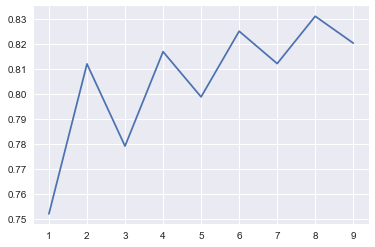

In [68]:
# automatic grid search for an optimal value of K

from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()


In [69]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.831111654641
{'n_neighbors': 8}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')


In [70]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn). 
# Use the optimal k value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [71]:
#Model evaluation without valdation
print  metrics.accuracy_score(y_test, knn.predict(X_test))
print  metrics.confusion_matrix(y_test, knn.predict(X_test))
print  metrics.classification_report(y_test, knn.predict(X_test))
print  metrics.roc_auc_score(y_test, knn.predict(X_test))

0.90586797066
[[2156   81]
 [ 150   67]]
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      2237
          1       0.45      0.31      0.37       217

avg / total       0.89      0.91      0.90      2454

0.636273275803


In [72]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.75794621  0.90586797  0.86797066  0.88141809  0.87286064  0.69437653
  0.78239609  0.8190709   0.74173807  0.87990196]
0.820354711734


> # Random Forest

In [73]:
# develop a random forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

1.0

In [74]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))

1.0
[[7359    0]
 [   0  818]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7359
          1       1.00      1.00      1.00       818

avg / total       1.00      1.00      1.00      8177



In [75]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0169, 'Harm'), (0.0268, 'State_CAT'), (0.0309, 'Breach_Type_CAT'), (0.0665, 'NonProfit'), (0.0706, 'Breach_Year'), (0.1368, 'Other'), (0.1479, 'Government'), (0.1545, 'Finance'), (0.1697, 'Retail'), (0.1794, 'Medical')]


In [76]:
# another method
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,Breach_Year,0.070563
1,Harm,0.016946
2,Breach_Type_CAT,0.030857
3,State_CAT,0.026793
4,Finance,0.154525
5,Other,0.136847
6,Retail,0.169731
7,Government,0.147867
8,Medical,0.179353
9,NonProfit,0.066519


- Features in order are Physical, Hacking, Portable 

In [77]:
#Predict class probabilities for X
clf.predict_proba(X)
# 1st value: the probability of no harm
# 2nd value: the probability of harm 

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

> # Feature Selection

> ## SelectKBest & Decision Tree
- Run SelectKBest and develop a decision tree based on the results of SelectKBest
- use k = 8

In [78]:
# SelectKBest
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print X_new

[[1 0]
 [0 1]
 [0 0]
 ..., 
 [1 0]
 [0 1]
 [0 1]]


In [79]:
X.head(5)
# best predictors are '' '' '' ''

,Breach_Year,Harm,Breach_Type_CAT,State_CAT,Finance,Other,Retail,Government,Medical,NonProfit
0,2006,1,5,0,0,1,0,0,0,0
1,2007,1,5,0,0,0,0,0,1,0
2,2007,1,5,0,1,0,0,0,0,0
3,2007,1,5,0,1,0,0,0,0,0
4,2007,0,3,0,0,1,0,0,0,0


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
# build a decision tree model with those 4 variables 
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt_model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

#dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=5)
#dt_simple = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)


#Model evaluation
print metrics.accuracy_score(y_test, dt_model.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt_model.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt_model.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt_model.predict(X_test))

0.911572942135
--------------------------------------------------------
[[2237    0]
 [ 217    0]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      2237
          1       0.00      0.00      0.00       217

avg / total       0.83      0.91      0.87      2454

--------------------------------------------------------
0.5


In [82]:
# visualize decision tree
X_new_df = pd.DataFrame(X_new)
# X_new_df = X_new_df.rename(columns={0: 'Age', 1: 'Income', 2: 'Married', 3: 'Children'})
tree.export_graphviz(dt_model, out_file='decisiontree_m.dot', feature_names=X_new_df.columns)

In [83]:
# embed the decision tree
from IPython.display import Image
Image("decisiontree_m.png")

>> # RFE
- Run RFE with logistic regression model
- 3 highest ranking X variables

In [84]:
# build logisticRegression
model = LogisticRegression()
# selecting 3 highest ranking X variables
rfe = RFE(model, 3)  #asking three best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)




[False False False False False  True False  True  True False]
[7 5 6 8 2 1 3 1 1 4]


In [85]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,Breach_Year,7
1,Harm,5
2,Breach_Type_CAT,6
3,State_CAT,8
4,Finance,2
5,Other,1
6,Retail,3
7,Government,1
8,Medical,1
9,NonProfit,4


In [86]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'Government'), (1, 'Medical'), (1, 'Other'), (2, 'Finance'), (3, 'Retail'), (4, 'NonProfit'), (5, 'Harm'), (6, 'Breach_Type_CAT'), (7, 'Breach_Year'), (8, 'State_CAT')]


In [88]:
#select most significant features only 
X_logistic = df_stat_sp[['Government', 'Medical', 'Other', 'Finance', 'Retail']]
print X_logistic.head()

   Government  Medical  Other  Finance  Retail
0           0        0      1        0       0
1           0        1      0        0       0
2           0        0      0        1       0
3           0        0      0        1       0
4           0        0      1        0       0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.984515077425
[[2199   38]
 [   0  217]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      2237
          1       0.85      1.00      0.92       217

avg / total       0.99      0.98      0.99      2454

0.991506481895


Logistic regression does not appear to work as well as other models.

>> # ExtraTreeClassifier

In [90]:
# build ExtraTreesClassifier
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
model_extra.score(X, y)

# display the relative importance of each attribute
print(model_extra.feature_importances_)

[ 0.0532577   0.0211608   0.02219607  0.00600892  0.23260449  0.10228172
  0.12995018  0.17037903  0.20028162  0.06187947]


In [91]:
# What are 5 highest ranking X variables according to ExtraTreeClassifier
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 5), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.00601, 'State_CAT'), (0.02116, 'Harm'), (0.0222, 'Breach_Type_CAT'), (0.05326, 'Breach_Year'), (0.06188, 'NonProfit'), (0.10228, 'Other'), (0.12995, 'Retail'), (0.17038, 'Government'), (0.20028, 'Medical'), (0.2326, 'Finance')]


> ExtraTreeClassifier shows Finance, Medical, Government, Retail, Other, NonProfit.